###  美国各州人口数据分析

首先导入文件，并查看数据样本

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

#### 加载数据
- state-abbrevs.csv
- state-areas.csv
- state-population.csv

In [7]:
abbrevs = pd.read_csv('data/12_美国人口数据分析项目/state-abbrevs.csv')
areas = pd.read_csv('data/12_美国人口数据分析项目/state-areas.csv')
population = pd.read_csv('data/12_美国人口数据分析项目/state-population.csv')

#### 合并population与abbrevs两个DataFrame
- 分别依据state/region列和abbreviation列来合并。
- 为了保留所有信息，使用外合并。merge()

In [10]:
merged = pd.merge(population, abbrevs, 
                 how='outer',
                 left_on='state/region', 
                 right_on='abbreviation')


#### 去除abbreviation的那一列（axis=1）

In [11]:
merged = merged.drop('abbreviation', axis=1)  # 这就是去除abbreviation列的代码
print("已成功去除abbreviation列，剩余列名:", merged.columns.tolist())

已成功去除abbreviation列，剩余列名: ['state/region', 'ages', 'year', 'population', 'state']


#### 查看存在缺失数据的列。
- 使用.isnull().any()

In [15]:
print("\n存在缺失数据的列:")
for col in missing_cols[missing_cols].index:
    print(f"- {col}: 有缺失值")


存在缺失数据的列:
- population: 有缺失值
- state: 有缺失值


#### 查看缺失数据
- 根据数据是否缺失情况显示数据，如果缺失为True，那么显示

In [13]:
print("缺失数据检查:")
print(merged.isnull().any())

缺失数据检查:
state/region    False
ages            False
year            False
population       True
state            True
dtype: bool


#### 找到有哪些state/region使得state的值为NaN
- 使用unique()查看非重复值

In [17]:

# 首先找出state为NaN的所有行
nan_rows = merged[merged['state'].isnull()]
print("所有state为NaN的记录:")
print(nan_rows[['state/region', 'state']])

# 然后提取state/region列的唯一值
unique_regions = nan_rows['state/region'].unique()
print("\n这些记录中state/column的唯一值:")
print(unique_regions)

所有state为NaN的记录:
     state/region state
1872           PR   NaN
1873           PR   NaN
1874           PR   NaN
1875           PR   NaN
1876           PR   NaN
...           ...   ...
2203          USA   NaN
2204          USA   NaN
2205          USA   NaN
2206          USA   NaN
2207          USA   NaN

[96 rows x 2 columns]

这些记录中state/column的唯一值:
['PR' 'USA']


#### 填充state这一列的所有NaN
- 找到的这些state/region的state项补上正确的值

> PR  => Puerto Rico 
>
> USA => United State

In [18]:
# 填充state列的NaN值
print("\n步骤：填充state列的NaN值")

# 1. 首先确认当前state列的缺失情况
print("填充前state列的缺失值数量:", merged['state'].isnull().sum())

# 2. 特殊值处理
print("\n处理特殊值:")
# PR => Puerto Rico
pr_mask = merged['state/region'] == 'PR'
merged.loc[pr_mask, 'state'] = 'Puerto Rico'
print(f"- 处理PR: 将{sum(pr_mask)}条记录的state设置为Puerto Rico")

# USA => United States
usa_mask = merged['state/region'] == 'USA'
merged.loc[usa_mask, 'state'] = 'United States'
print(f"- 处理USA: 将{sum(usa_mask)}条记录的state设置为United States")

# 3. 验证填充结果
print("\n填充后检查:")
print("state列仍有缺失值数量:", merged['state'].isnull().sum())
print("\nPR记录处理结果示例:")
print(merged[pr_mask][['state/region', 'state']].head())
print("\nUSA记录处理结果示例:")
print(merged[usa_mask][['state/region', 'state']].head())

# 4. 检查是否还有其他需要处理的缺失值
other_nan = merged['state'].isnull()
if other_nan.any():
    print("\n警告: 发现其他需要处理的缺失值，对应的state/region:")
    print(merged[other_nan]['state/region'].unique())
else:
    print("\n所有state列的缺失值已成功处理")


步骤：填充state列的NaN值
填充前state列的缺失值数量: 96

处理特殊值:
- 处理PR: 将48条记录的state设置为Puerto Rico
- 处理USA: 将48条记录的state设置为United States

填充后检查:
state列仍有缺失值数量: 0

PR记录处理结果示例:
     state/region        state
1872           PR  Puerto Rico
1873           PR  Puerto Rico
1874           PR  Puerto Rico
1875           PR  Puerto Rico
1876           PR  Puerto Rico

USA记录处理结果示例:
     state/region          state
2160          USA  United States
2161          USA  United States
2162          USA  United States
2163          USA  United States
2164          USA  United States

所有state列的缺失值已成功处理


#### 合并各州面积数据areas，使用左合并。

#### 继续寻找存在缺失数据的列

In [19]:
# 合并各州面积数据areas（左合并）
print("\n步骤：合并面积数据(左合并)")

# 1. 首先查看areas数据
print("\n面积数据预览:")
print(areas.head())
print("\n面积数据形状:", areas.shape)

# 2. 执行左合并
final = pd.merge(merged, areas, 
                how='left',  # 关键参数：左合并
                on='state')  # 根据state列合并

# 3. 验证合并结果
print("\n合并后数据形状:", final.shape)
print("\n合并后列名:", final.columns.tolist())
print("\n合并后面积数据缺失情况:")
print(final['area (sq. mi)'].isnull().value_counts())

# 4. 检查哪些州的面积数据缺失
missing_area = final[final['area (sq. mi)'].isnull()]
if not missing_area.empty:
    print("\n以下州的面积数据缺失:")
    print(missing_area['state'].unique())
else:
    print("\n所有州都有面积数据")

# 5. 合并后数据示例
print("\n合并后数据示例:")
print(final.head())


步骤：合并面积数据(左合并)

面积数据预览:
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

面积数据形状: (52, 2)

合并后数据形状: (2544, 6)

合并后列名: ['state/region', 'ages', 'year', 'population', 'state', 'area (sq. mi)']

合并后面积数据缺失情况:
area (sq. mi)
False    2496
True       48
Name: count, dtype: int64

以下州的面积数据缺失:
['United States']

合并后数据示例:
  state/region     ages  year  population   state  area (sq. mi)
0           AK    total  1990    553290.0  Alaska       656425.0
1           AK  under18  1990    177502.0  Alaska       656425.0
2           AK    total  1992    588736.0  Alaska       656425.0
3           AK  under18  1991    182180.0  Alaska       656425.0
4           AK  under18  1992    184878.0  Alaska       656425.0


#### 我们会发现area(sq.mi)这一列有缺失数据，为了找出是哪一行，我们需要找出是哪个state没有数据


步骤：找出面积数据缺失的州
以下州的面积数据缺失:
- United States

共有1个州的面积数据缺失
共影响48条记录

缺失面积数据的记录示例:
              state state/region  year     ages
2160  United States          USA  1990  under18
2161  United States          USA  1990    total
2162  United States          USA  1991    total
2163  United States          USA  1991  under18
2164  United States          USA  1992  under18


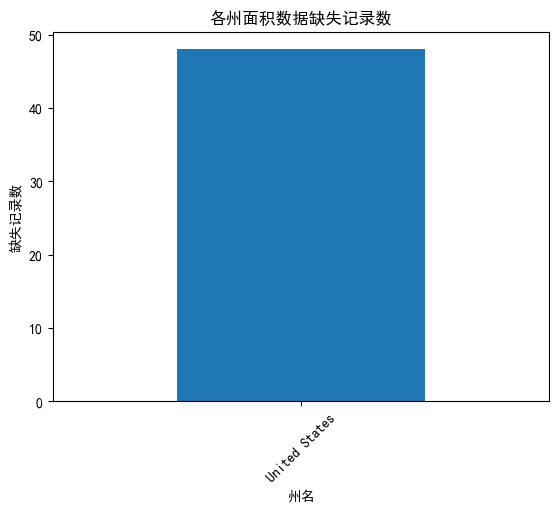

In [ ]:
# 找出area(sq.mi)列缺失数据对应的state
print("\n步骤：找出面积数据缺失的州")

# 1. 找出area列有缺失值的行
missing_area = final[final['area (sq. mi)'].isnull()]

# 2. 获取这些行对应的唯一state值
states_with_missing_area = missing_area['state'].unique()

# 3. 打印结果
print("以下州的面积数据缺失:")
for state in states_with_missing_area:
    print(f"- {state}")

# 4. 统计缺失数量
print(f"\n共有{len(states_with_missing_area)}个州的面积数据缺失")
print(f"共影响{len(missing_area)}条记录")

# 5. 查看缺失记录的详细信息
print("\n缺失面积数据的记录示例:")
print(missing_area[['state', 'state/region', 'year', 'ages']].head())

# 6. 可视化缺失情况
import matplotlib.pyplot as plt
missing_area['state'].value_counts().plot(kind='bar')
plt.title('各州面积数据缺失记录数')
plt.xlabel('州名')
plt.ylabel('缺失记录数')
plt.xticks(rotation=45)
plt.show()

#### 去除含有缺失数据的行

In [21]:
# 去除含有缺失数据的行
print("\n步骤：去除含有缺失数据的行")

# 1. 首先查看当前数据缺失情况
print("处理前缺失值统计:")
print(final.isnull().sum())

# 2. 记录处理前行数
original_rows = final.shape[0]

# 3. 执行去除缺失值操作
final_clean = final.dropna()

# 4. 记录处理后行数
cleaned_rows = final_clean.shape[0]

# 5. 打印处理结果
print(f"\n已去除{original_rows - cleaned_rows}行缺失数据")
print("处理后数据形状:", final_clean.shape)
print("\n处理后缺失值统计:")
print(final_clean.isnull().sum())
# 6. 保存处理后的数据
final = final_clean.copy()
print("\n缺失数据处理完成，数据已更新")


步骤：去除含有缺失数据的行
处理前缺失值统计:
state/region      0
ages              0
year              0
population       20
state             0
area (sq. mi)    48
dtype: int64

已去除68行缺失数据
处理后数据形状: (2476, 6)

处理后缺失值统计:
state/region     0
ages             0
year             0
population       0
state            0
area (sq. mi)    0
dtype: int64

缺失数据处理完成，数据已更新


#### 再查看数据是否缺失


步骤：验证数据缺失情况

各列缺失值数量:
state/region     0
ages             0
year             0
population       0
state            0
area (sq. mi)    0
dtype: int64

数据清洗完成，无缺失值

数据完整性报告:
总单元格数: 14856
缺失单元格数: 0
数据完整率: 100.00%


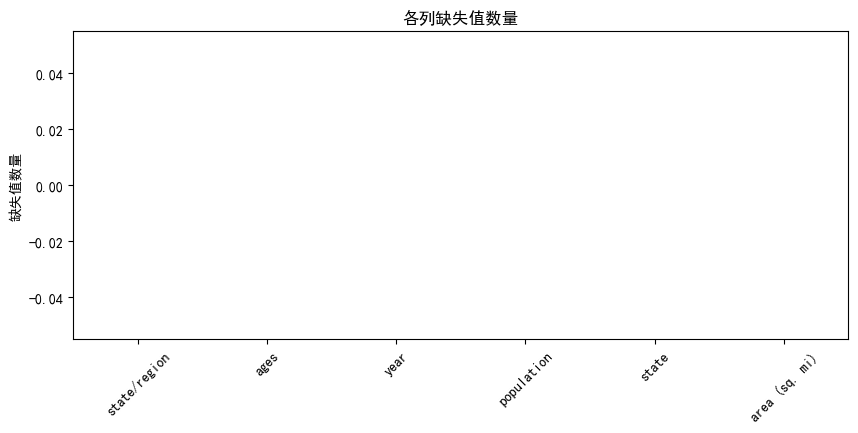

In [22]:
# 再次检查数据缺失情况
print("\n步骤：验证数据缺失情况")

# 1. 检查各列缺失值
missing_check = final.isnull().sum()
print("\n各列缺失值数量:")
print(missing_check)

# 2. 检查是否存在任何缺失值
if missing_check.sum() == 0:
    print("\n数据清洗完成，无缺失值")
else:
    print("\n警告：数据中仍存在缺失值")
    print("存在缺失值的列:")
    print(missing_check[missing_check > 0])
    
    # 3. 详细查看缺失数据（可选）
    print("\n缺失数据详情:")
    missing_data = final[final.isnull().any(axis=1)]
    print(missing_data.head())

# 4. 数据完整性报告
total_cells = final.size
missing_cells = missing_check.sum()
print(f"\n数据完整性报告:")
print(f"总单元格数: {total_cells}")
print(f"缺失单元格数: {missing_cells}")
print(f"数据完整率: {(1 - missing_cells/total_cells)*100:.2f}%")

# 5. 可视化缺失情况（可选）
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
missing_check.plot(kind='bar')
plt.title('各列缺失值数量')
plt.ylabel('缺失值数量')
plt.xticks(rotation=45)
plt.show()

#### 找出2010年的全民人口数据
- df.query(查询语句)

In [25]:
# 找出2010年的全民人口数据
print("\n步骤：筛选2010年全民人口数据")

# 1. 使用query方法筛选数据
pop_2010 = final.query("year == 2010 & ages == 'total'")

# 2. 验证筛选结果
print(f"筛选到{len(pop_2010)}条2010年全民人口数据")
print("\n数据预览:")
print(pop_2010.head())

# 3. 检查年份和年龄范围
print("\n包含的年份:", pop_2010['year'].unique())
print("包含的年龄范围:", pop_2010['ages'].unique())

# 4. 数据统计信息
print("\n2010年人口数据统计摘要:")
print(pop_2010['population'].describe())



步骤：筛选2010年全民人口数据
筛选到52条2010年全民人口数据

数据预览:
    state/region   ages  year  population       state  area (sq. mi)
43            AK  total  2010    713868.0      Alaska       656425.0
51            AL  total  2010   4785570.0     Alabama        52423.0
141           AR  total  2010   2922280.0    Arkansas        53182.0
149           AZ  total  2010   6408790.0     Arizona       114006.0
197           CA  total  2010  37333601.0  California       163707.0

包含的年份: [2010]
包含的年龄范围: ['total']

2010年人口数据统计摘要:
count    5.200000e+01
mean     6.020144e+06
std      6.779836e+06
min      5.642220e+05
25%      1.765058e+06
50%      4.092453e+06
75%      6.608011e+06
max      3.733360e+07
Name: population, dtype: float64


#### 以state列作为新的行索引
- 使用set_index

In [27]:
# 将state列设为行索引
print("\n步骤：设置state列为行索引")

# 1. 检查当前索引和state列
print("当前索引:", pop_2010.index.name or "默认整数索引")
print("state列示例值:", pop_2010['state'].head().tolist())

# 2. 执行set_index操作
pop_2010_indexed = pop_2010.set_index('state')

# 3. 验证索引变更
print("\n设置索引后结果:")
print("新索引:", pop_2010_indexed.index.name)
print("前5行索引值:", pop_2010_indexed.index[:5].tolist())
print("\n数据预览:")
print(pop_2010_indexed.head())

# 4. 检查列变化
print("\n列名变化(应不再包含state列):")
print("当前列名:", pop_2010_indexed.columns.tolist())

# 5. 索引操作后的数据统计
print("\n各州记录统计:")
print(pop_2010_indexed.index.value_counts().head())


步骤：设置state列为行索引
当前索引: 默认整数索引
state列示例值: ['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California']

设置索引后结果:
新索引: state
前5行索引值: ['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California']

数据预览:
           state/region   ages  year  population  area (sq. mi)
state                                                          
Alaska               AK  total  2010    713868.0       656425.0
Alabama              AL  total  2010   4785570.0        52423.0
Arkansas             AR  total  2010   2922280.0        53182.0
Arizona              AZ  total  2010   6408790.0       114006.0
California           CA  total  2010  37333601.0       163707.0

列名变化(应不再包含state列):
当前列名: ['state/region', 'ages', 'year', 'population', 'area (sq. mi)']

各州记录统计:
state
Alaska           1
Alabama          1
North Dakota     1
Nebraska         1
New Hampshire    1
Name: count, dtype: int64


#### 计算人口密度density


步骤：计算人口密度(population/area)
人口密度计算完成，新增density列

密度统计摘要:
count      52.000000
mean      351.531358
std      1231.673377
min         1.087509
25%        46.120680
50%        92.637629
75%       223.278439
max      8898.897059
Name: density, dtype: float64

最高密度前5州:
state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Name: density, dtype: float64


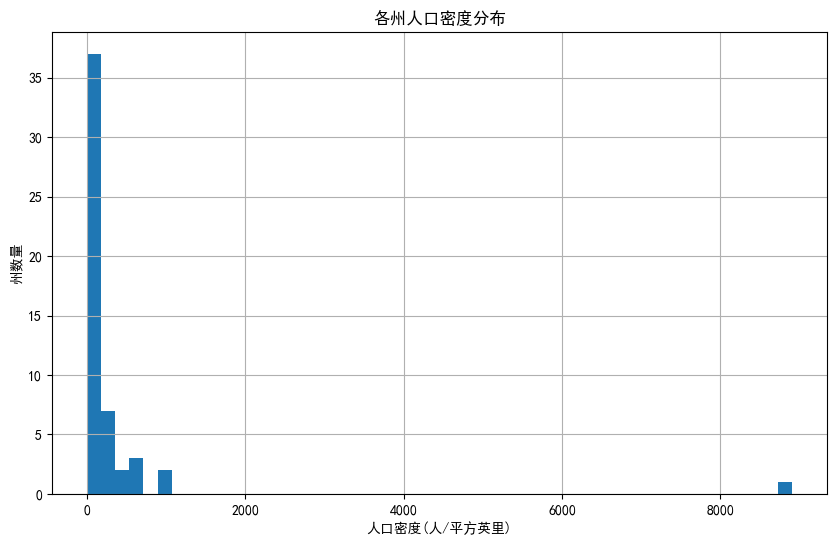

In [28]:
# 计算人口密度
print("\n步骤：计算人口密度(population/area)")

# 1. 检查所需列是否存在
required_cols = ['population', 'area (sq. mi)']
if all(col in pop_2010_indexed.columns for col in required_cols):
    # 2. 计算人口密度
    pop_2010_indexed['density'] = pop_2010_indexed['population'] / pop_2010_indexed['area (sq. mi)']
    
    # 3. 验证计算结果
    print("人口密度计算完成，新增density列")
    print("\n密度统计摘要:")
    print(pop_2010_indexed['density'].describe())
    
    # 4. 检查极端值
    print("\n最高密度前5州:")
    print(pop_2010_indexed['density'].sort_values(ascending=False).head())
    
    # 5. 密度分布可视化
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    pop_2010_indexed['density'].hist(bins=50)
    plt.title('各州人口密度分布')
    plt.xlabel('人口密度(人/平方英里)')
    plt.ylabel('州数量')
    plt.show()
else:
    missing_cols = [col for col in required_cols if col not in pop_2010_indexed.columns]
    print(f"错误：缺少必要列{missing_cols}，无法计算密度")

#### 排序，并找出人口密度最高的五个州sort_values()


步骤：找出人口密度最高的5个州
人口密度最高的5个州:
排名	州名			人口密度(人/平方英里)
1	District of Columbia	8,898.90
2	Puerto Rico    	1,058.67
3	New Jersey     	1,009.25
4	Rhode Island   	681.34
5	Connecticut    	645.60

详细数据:
                      population  area (sq. mi)      density
state                                                       
District of Columbia    605125.0           68.0  8898.897059
Puerto Rico            3721208.0         3515.0  1058.665149
New Jersey             8802707.0         8722.0  1009.253268
Rhode Island           1052669.0         1545.0   681.339159
Connecticut            3579210.0         5544.0   645.600649


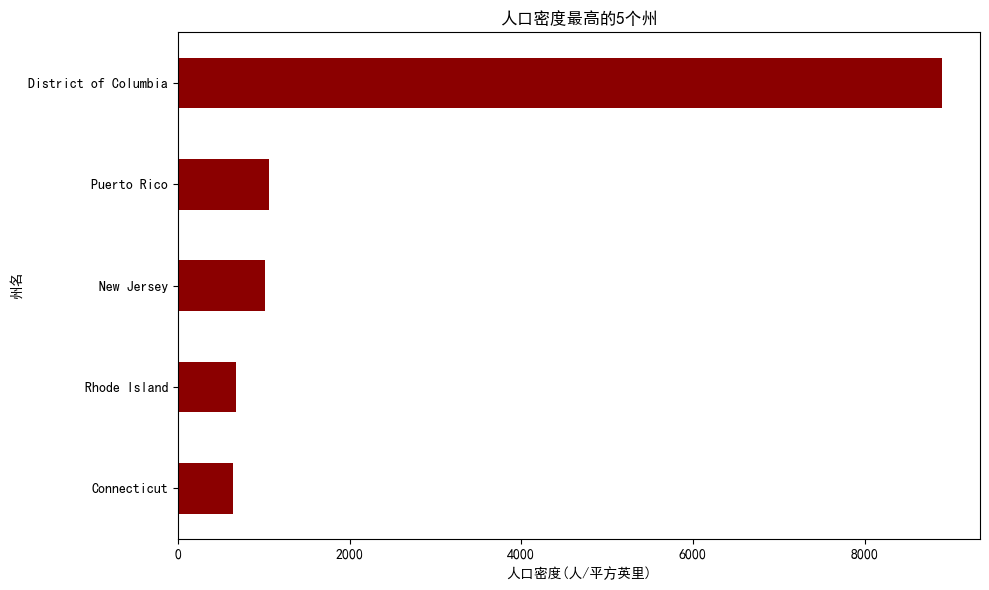


结果已保存到top5_density_states.csv文件


In [29]:
# 找出人口密度最高的5个州
print("\n步骤：找出人口密度最高的5个州")

# 1. 按density降序排序
top5_density = pop_2010_indexed.sort_values('density', ascending=False).head(5)

# 2. 格式化输出结果
print("人口密度最高的5个州:")
print("排名\t州名\t\t\t人口密度(人/平方英里)")
for i, (state, row) in enumerate(top5_density.iterrows(), 1):
    print(f"{i}\t{state.ljust(15)}\t{row['density']:,.2f}")

# 3. 详细数据展示
print("\n详细数据:")
print(top5_density[['population', 'area (sq. mi)', 'density']])

# 4. 可视化展示
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
top5_density['density'].sort_values().plot(kind='barh', color='darkred')
plt.title('人口密度最高的5个州')
plt.xlabel('人口密度(人/平方英里)')
plt.ylabel('州名')
plt.tight_layout()
plt.show()

# 5. 保存结果
top5_density.to_csv('top5_density_states.csv')
print("\n结果已保存到top5_density_states.csv文件")

#### 排序，找出人口密度最低的五个州


步骤：找出人口密度最低的5个州
人口密度最低的5个州:
排名	州名			人口密度(人/平方英里)
1	Alaska         	1.09
2	Wyoming        	5.77
3	Montana        	6.74
4	North Dakota   	9.54
5	South Dakota   	10.58

详细数据:
              population  area (sq. mi)    density
state                                             
Alaska          713868.0       656425.0   1.087509
Wyoming         564222.0        97818.0   5.768079
Montana         990527.0       147046.0   6.736171
North Dakota    674344.0        70704.0   9.537565
South Dakota    816211.0        77121.0  10.583512


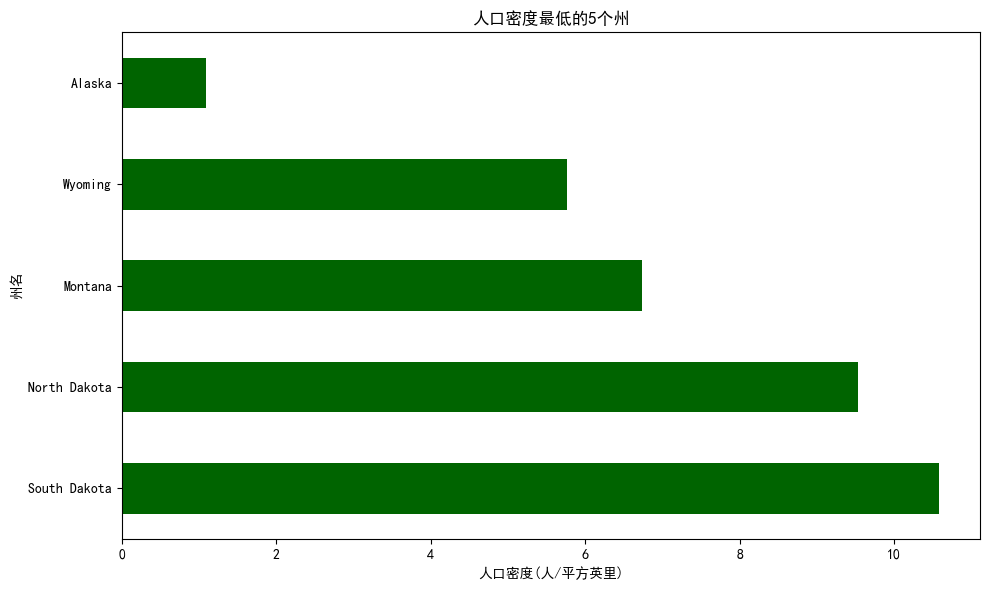


结果已保存到bottom5_density_states.csv文件

高低密度对比:
最高密度州: 8,898.90 (平均)
最低密度州: 1.09 (平均)
相差倍数: 8182.8倍


In [30]:
# 找出人口密度最低的5个州
print("\n步骤：找出人口密度最低的5个州")

# 1. 按density升序排序
bottom5_density = pop_2010_indexed.sort_values('density').head(5)

# 2. 格式化输出结果
print("人口密度最低的5个州:")
print("排名\t州名\t\t\t人口密度(人/平方英里)")
for i, (state, row) in enumerate(bottom5_density.iterrows(), 1):
    print(f"{i}\t{state.ljust(15)}\t{row['density']:,.2f}")

# 3. 详细数据展示
print("\n详细数据:")
print(bottom5_density[['population', 'area (sq. mi)', 'density']])

# 4. 可视化展示
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
bottom5_density['density'].sort_values(ascending=False).plot(kind='barh', color='darkgreen')
plt.title('人口密度最低的5个州')
plt.xlabel('人口密度(人/平方英里)')
plt.ylabel('州名')
plt.tight_layout()
plt.show()

# 5. 保存结果
bottom5_density.to_csv('bottom5_density_states.csv')
print("\n结果已保存到bottom5_density_states.csv文件")

# 6. 高低密度对比分析
print("\n高低密度对比:")
print(f"最高密度州: {top5_density['density'].max():,.2f} (平均)")
print(f"最低密度州: {bottom5_density['density'].min():,.2f} (平均)")
print(f"相差倍数: {top5_density['density'].max()/bottom5_density['density'].min():.1f}倍")